# Gaussian Naive Bayes Classifier for Breast Cancer Dataset
- Implement a simple program using GaussianNB() to classify the data samples (including train and test data samples). Report the prediction accuracy and confusion matrix of the classifier.
- Add (30-dimensional) zero-mean Gaussian noises with different variances (at least 5, e.g., 50, 100, 200, 400, 800) to the features of the dataset; train Gaussian Naïve Bayes classifiers to classify the noisy datasets and report the prediction accuracies and confusion matrices of the classifiers.

In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import metrics
import os
import math

In [2]:
# connect to Kaggle open-source database
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/breast-cancer-wisconsin-data/data.csv


# 1. Data Processing 

In [3]:
# import dataset
df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Note**: we will drop *id* and *Unnamed* columns as they does not contribute to the learning process of the model.

## 1.1. Data Visualization
Let's plot the malignent and benign cancer data points.

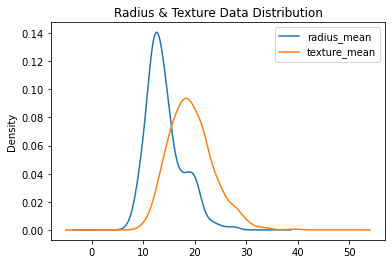

In [5]:
# plot the distribution of points
plt.title("Radius & Texture Data Distribution")
df['radius_mean'].plot(kind='kde')
df['texture_mean'].plot(kind='kde')
plt.legend()
plt.show()

## 1.2. Data Processing

In [6]:
# drop columns
df = df.drop(['id'], axis=1)
df = df.drop(['Unnamed: 32'], axis=1)

In [7]:
# Examine and replace missing values 
print(df.isnull().values.any())

False


**Note**: split the dataset into input features and labels.

In [8]:
# convert character into numerical value for easily calculate the 
df['diagnosis'] = [1 if i == 'M' else 0 for i in df['diagnosis']]

In [9]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# split the dataset into input features and target label
X = df.drop(["diagnosis"], axis=1)
y = df['diagnosis'].to_numpy().reshape(-1, 1)

In [11]:
# check shapes
print(X.shape)
print(y.shape)

(569, 30)
(569, 1)


In [12]:
# data normalization
X_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X = X_scaler.fit_transform(X)

y_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
y = y_scaler.fit_transform(y)

In [13]:
# partition into training/test/validation 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 2. Gaussian Naive Bayes On Original Dataset

In [14]:
# create model
gnb1 = GaussianNB()

In [15]:
# train model on training dataset
gnb1.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [16]:
# predict on validate set
y_test_pred = gnb1.predict(X_test)

# predict on train set
y_train_pred = gnb1.predict(X_train)

accuracy = metrics.accuracy_score(y_test, y_test_pred)
f1 = metrics.f1_score(y_test, y_test_pred)
prec = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
roc_auc = metrics.roc_auc_score(y_test, y_test_pred)
cm = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze())
tn, fp, fn, tp = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze()).ravel()

print("Training MSE = %f" % metrics.mean_squared_error(y_train, y_train_pred))
print("Validating MSE = %f" % metrics.mean_squared_error(y_test, y_test_pred))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))
print('\n-----------------------------')
print('SUBMIT')
print('-----------------------------')
print('Accuracy = %f' % (accuracy))
print(f'Confusion Matrix = \n{cm}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')

Training MSE = 0.231156
Validating MSE = 0.350877
F1 Score = 0.883721
Precision Score = 0.863636
Recall Score = 0.904762
ROC-AUC Score = 0.910714

-----------------------------
SUBMIT
-----------------------------
Accuracy = 0.912281
Confusion Matrix = 
[[99  9]
 [ 6 57]]
True Negative: 99
False Positive: 9
False Negative: 6
True Positive: 57


# 3. Gaussian Naive Bayes On Noisy Dataset

In [17]:
# re-import dataset
df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [18]:
# drop columns
df = df.drop(['id'], axis=1)
df = df.drop(['Unnamed: 32'], axis=1)

In [19]:
# convert character into numerical value for easily calculate the 
df['diagnosis'] = [1 if i == 'M' else 0 for i in df['diagnosis']]

In [20]:
# split the dataset into input features and target label
X = df.drop(["diagnosis"], axis=1)
y = df['diagnosis'].to_numpy().reshape(-1, 1)

In [21]:
# check shapes
print(X.shape)
print(y.shape)

(569, 30)
(569, 1)


In [22]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
# create noisy Gaussian-distributed noisy data with same matrix size
# Reference: https://stackoverflow.com/questions/46093073/adding-gaussian-noise-to-a-dataset-of-floating-points-and-save-it-python

# zero-mean noise with variance 50
noise_1 = np.random.normal(loc=0, scale=math.sqrt(50), size=[569, 30]) 

# zero-mean noise with variance 100
noise_2 = np.random.normal(loc=0, scale=math.sqrt(100), size=[569, 30]) 

# zero-mean noise with variance 200
noise_3 = np.random.normal(loc=0, scale=math.sqrt(200), size=[569, 30]) 

# zero-mean noise with variance 400
noise_4 = np.random.normal(loc=0, scale=math.sqrt(400), size=[569, 30]) 

# zero-mean noise with variance 800
noise_5 = np.random.normal(loc=0, scale=math.sqrt(800), size=[569, 30]) 

In [24]:
# add 5 gaussian noise to dataset
X = X + noise_1 + noise_2 + noise_3 + noise_4 + noise_5

In [25]:
# view dataset
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-21.553904,40.840750,163.421443,1015.809581,3.588585,74.462159,-4.088164,-12.374893,34.123656,-7.204060,...,-16.850051,64.314894,219.918855,2036.192265,4.792171,-33.747437,104.817107,-29.882232,-18.509291,-24.540838
1,-2.358596,21.166737,114.868824,1329.105436,-31.579756,-9.003749,84.858299,-25.473463,43.715556,-40.287006,...,42.236764,30.838591,151.597160,1930.474831,-7.614350,10.067797,1.726801,-2.096906,40.854021,20.754918
2,30.378836,26.353586,139.339732,1195.619362,-33.641754,-21.733314,50.954105,18.923826,-27.860686,36.805859,...,23.806316,-11.520292,174.742807,1748.900988,85.533322,16.937244,22.734269,66.753494,-56.247728,8.666895
3,45.894561,94.822800,71.837186,362.598815,27.969064,36.031836,-1.784961,43.757330,19.199819,-18.941119,...,88.272751,-58.272072,169.792312,612.702249,54.255899,-2.536026,41.543077,-56.178439,-23.078561,-4.181115
4,73.443581,25.977894,98.710393,1272.891106,-75.201594,41.871077,-38.834791,-0.289698,-40.228888,-18.435888,...,23.954268,50.230243,172.730498,1551.506417,-31.836983,33.635894,-11.763142,12.237814,-28.413821,25.583826


## 3.1. Data Visualization

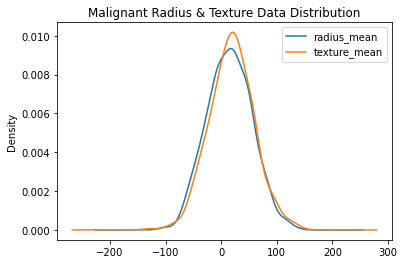

In [26]:
# plot the distribution of points
plt.title("Malignant Radius & Texture Data Distribution")
X['radius_mean'].plot(kind='kde')
X['texture_mean'].plot(kind='kde')
plt.legend()
plt.show()

## 3.2. Data Processing

In [27]:
# data normalization
X_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X = X_scaler.fit_transform(X)

y_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
y = y_scaler.fit_transform(y)

## 3.3. Modeling

In [28]:
# create model
gnb2 = GaussianNB()

In [29]:
# train model on training dataset
gnb2.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [30]:
# predict on validate set
y_test_pred = gnb2.predict(X_test)

# predict on train set
y_train_pred = gnb2.predict(X_train)

accuracy = metrics.accuracy_score(y_test, y_test_pred)
f1 = metrics.f1_score(y_test, y_test_pred)
prec = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
roc_auc = metrics.roc_auc_score(y_test, y_test_pred)
cm = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze())
tn, fp, fn, tp = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze()).ravel()

print("Training MSE = %f" % metrics.mean_squared_error(y_train, y_train_pred))
print("Validating MSE = %f" % metrics.mean_squared_error(y_test, y_test_pred))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))
print('\n-----------------------------')
print('SUBMIT')
print('-----------------------------')
print('Accuracy = %f' % (accuracy))
print(f'Confusion Matrix = \n{cm}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')

Training MSE = 0.231156
Validating MSE = 0.350877
F1 Score = 0.883721
Precision Score = 0.863636
Recall Score = 0.904762
ROC-AUC Score = 0.910714

-----------------------------
SUBMIT
-----------------------------
Accuracy = 0.912281
Confusion Matrix = 
[[99  9]
 [ 6 57]]
True Negative: 99
False Positive: 9
False Negative: 6
True Positive: 57
